Распарсить фаил с данными с уровнемера на р. Преголя.
Фаил с данными: mpo86181.102

На выходе графики временных рядов ветра в виде stick plot и уровня.

[   ['01.01.2002 00:00', 315, 8],
    ['01.01.2002 06:00', 360, 8],
    ['01.01.2002 12:00', 270, 8],
    ['01.01.2002 18:00', 225, 14],
    ['02.01.2002 00:00', 225, 14],
    ['02.01.2002 06:00', 315, 14],
    ['02.01.2002 12:00', 360, 14],
    ['02.01.2002 18:00', 90, 10],
    ['03.01.2002 00:00', 90, 6],
    ['03.01.2002 06:00', 90, 4],
    ['03.01.2002 12:00', 135, 2],
    ['03.01.2002 18:00', 135, 2],
    ['04.01.2002 00:00', 180, 4],
    ['04.01.2002 06:00', 270, 10],
    ['04.01.2002 12:00', 270, 12],
    ['04.01.2002 18:00', 270, 8],
    ['05.01.2002 00:00', 270, 4],
    ['05.01.2002 06:00', 270, 6],
    ['05.01.2002 12:00', 270, 6],
    ['05.01.2002 18:00', 270, 8],
    ['06.01.2002 00:00', 270, 12],
    ['06.01.2002 06:00', 270, 10],
    ['06.01.2002 12:00', 270, 6],
    ['06.01.2002 18:00', 270, 4],
    ['07.01.2002 00:00', 270, 2],
    ['07.01.2002 06:00', 0, 0],
    ['07.01.2002 12:00', 180, 2],
    ['07.01.2002 18:00', 250, 4],
    ['08.01.2002 00:00', 200, 4],
    ['08.0

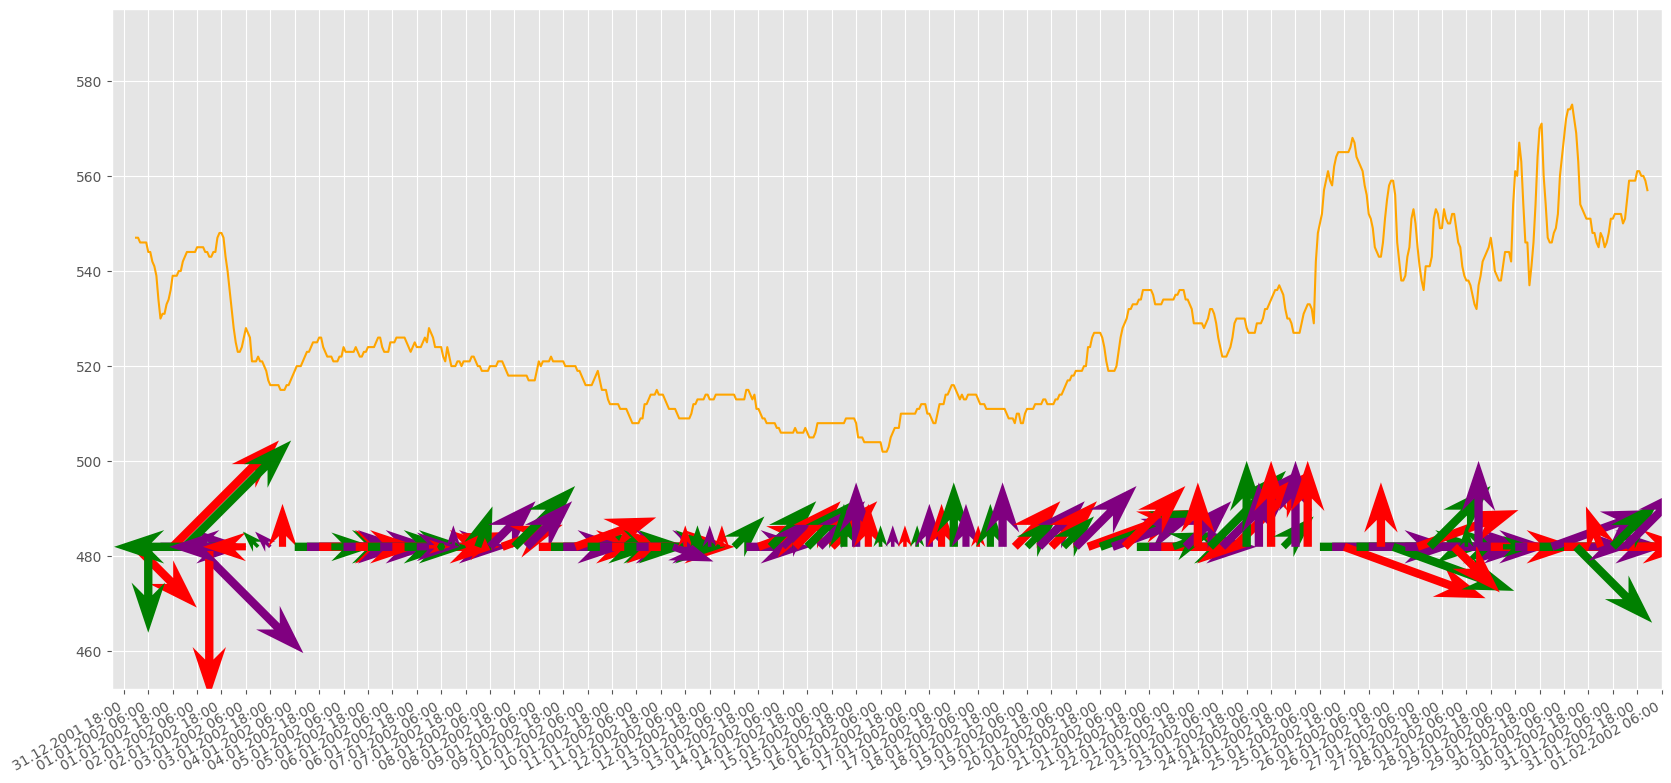

In [161]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from pprint import pprint
import math
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.figure(figsize=(20, 10))

with open("data/mpo86181.102", "r", encoding="latin-1") as file:
    data = file.read().strip().split("\n")
    data = [d.strip().split(",") for d in "".join(data).split("((")]


answer_1_table = []
answer_2_table = []
answer_3_table = []

answer_vector_table = []
year = data[0][3]
month = data[0][2]

for d in data[1:]:
    if d[2] != "=01":
        continue

    day = d[0]
    hour = d[1]
    minutes = "00"

    dir = int(d[5])
    mag = int(d[6])

    answer_1_table.append([f"{day}.{month}.{year} {hour}:{minutes}", dir, mag])

pprint(answer_1_table, indent=4)

for d in data[1:]:
    if d[2] != "=01":
        continue

    day = d[0]
    hour = d[1]
    minutes = "00"

    water = d[9]
    answer_3_table.append([f"{day}.{month}.{year} {hour}:{minutes}", water])

pprint(answer_3_table, indent=4)

for d in data[1:]:
    if len(d) <= 2 or d[1] != "=07":
        continue

    day = d[0]
    minutes = "00"

    for i in range(0, 24):
        answer_2_table.append([f"{day}.{month}.{year} {str(i).rjust(2, '0')}:{minutes}", d[i + 2]])

pprint(answer_2_table, indent=4)
indexes = [datetime.strptime(d[0], "%d.%m.%Y %H:%M") for d in answer_1_table]
ys = [min([int(d[1]) for d in answer_2_table]) - 20 for i in range(len(answer_1_table))]
dirs_x = [math.cos(math.radians(270 - d[1])) * d[2] for d in answer_1_table]
dirs_y = [math.sin(math.radians(270 - d[1])) * d[2] for d in answer_1_table]

print(indexes[0], ys[0], dirs_x[0], dirs_y[0])

# Задание цветов для графиков и стрелок
colors = ["yellow", "lightblue", "blue"]
arrow_colors = ["red", "green", "purple"]

# Построение стрелок
plt.quiver(indexes, ys, dirs_x, dirs_y, headwidth=4, headlength=6, color=arrow_colors)

# Форматирование осей x и y
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m.%Y %H:%M"))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))
plt.gcf().autofmt_xdate()
plt.xlim(
    datetime.strptime(answer_1_table[0][0], "%d.%m.%Y %H:%M") - timedelta(hours=12),
    datetime.strptime(answer_1_table[-1][0], "%d.%m.%Y %H:%M") + timedelta(hours=12),
)
plt.ylim(
    min([int(d[1]) for d in answer_2_table]) - 50, max([int(d[1]) for d in answer_2_table]) + 20
)

# Построение графика
sea_x = [datetime.strptime(d[0], "%d.%m.%Y %H:%M") for d in answer_2_table]
sea_y = [int(d[1]) for d in answer_2_table]
plt.plot(sea_x, sea_y, color="orange")  # Изменение цвета графика моря

plt.show()

Импорт библиотек

In [162]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from pprint import pprint
import math
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")

Читаем данные

In [163]:
file_path = "data/mpo86181.102"

with open(file_path, "r", encoding="latin-1") as file:
    raw_data = file.read().strip().split("\n")
    raw_data = [entry.strip().split(",") for entry in "".join(raw_data).split("((")]

In [164]:
answer_1_table = []

year = raw_data[0][3]
month = raw_data[0][2]

for entry in raw_data[1:]:
    if entry[2] != "=01":
        continue

    day = entry[0]
    hour = entry[1]
    minutes = "00"

    direction = int(entry[5])
    magnitude = int(entry[6])

    answer_1_table.append([f"{day}.{month}.{year} {hour}:{minutes}", direction, magnitude])

pprint(answer_1_table, indent=4)

[   ['01.01.2002 00:00', 315, 8],
    ['01.01.2002 06:00', 360, 8],
    ['01.01.2002 12:00', 270, 8],
    ['01.01.2002 18:00', 225, 14],
    ['02.01.2002 00:00', 225, 14],
    ['02.01.2002 06:00', 315, 14],
    ['02.01.2002 12:00', 360, 14],
    ['02.01.2002 18:00', 90, 10],
    ['03.01.2002 00:00', 90, 6],
    ['03.01.2002 06:00', 90, 4],
    ['03.01.2002 12:00', 135, 2],
    ['03.01.2002 18:00', 135, 2],
    ['04.01.2002 00:00', 180, 4],
    ['04.01.2002 06:00', 270, 10],
    ['04.01.2002 12:00', 270, 12],
    ['04.01.2002 18:00', 270, 8],
    ['05.01.2002 00:00', 270, 4],
    ['05.01.2002 06:00', 270, 6],
    ['05.01.2002 12:00', 270, 6],
    ['05.01.2002 18:00', 270, 8],
    ['06.01.2002 00:00', 270, 12],
    ['06.01.2002 06:00', 270, 10],
    ['06.01.2002 12:00', 270, 6],
    ['06.01.2002 18:00', 270, 4],
    ['07.01.2002 00:00', 270, 2],
    ['07.01.2002 06:00', 0, 0],
    ['07.01.2002 12:00', 180, 2],
    ['07.01.2002 18:00', 250, 4],
    ['08.01.2002 00:00', 200, 4],
    ['08.0

In [165]:
answer_2_table = []

for entry in raw_data[1:]:
    if len(entry) <= 2 or entry[1] != "=07":
        continue

    day = entry[0]
    minutes = "00"

    for i in range(0, 24):
        answer_2_table.append(
            [f"{day}.{month}.{year} {str(i).rjust(2, '0')}:{minutes}", entry[i + 2]]
        )

pprint(answer_2_table, indent=4)


[   ['01.01.2002 00:00', '547'],
    ['01.01.2002 01:00', '547'],
    ['01.01.2002 02:00', '546'],
    ['01.01.2002 03:00', '546'],
    ['01.01.2002 04:00', '546'],
    ['01.01.2002 05:00', '546'],
    ['01.01.2002 06:00', '544'],
    ['01.01.2002 07:00', '544'],
    ['01.01.2002 08:00', '542'],
    ['01.01.2002 09:00', '541'],
    ['01.01.2002 10:00', '539'],
    ['01.01.2002 11:00', '534'],
    ['01.01.2002 12:00', '530'],
    ['01.01.2002 13:00', '531'],
    ['01.01.2002 14:00', '531'],
    ['01.01.2002 15:00', '533'],
    ['01.01.2002 16:00', '534'],
    ['01.01.2002 17:00', '536'],
    ['01.01.2002 18:00', '539'],
    ['01.01.2002 19:00', '539'],
    ['01.01.2002 20:00', '539'],
    ['01.01.2002 21:00', '540'],
    ['01.01.2002 22:00', '540'],
    ['01.01.2002 23:00', '542'],
    ['02.01.2002 00:00', '543'],
    ['02.01.2002 01:00', '544'],
    ['02.01.2002 02:00', '544'],
    ['02.01.2002 03:00', '544'],
    ['02.01.2002 04:00', '544'],
    ['02.01.2002 05:00', '544'],
    ['02.0

In [166]:
answer_3_table = []

for entry in raw_data[1:]:
    if entry[2] != "=01":
        continue

    day = entry[0]
    hour = entry[1]
    minutes = "00"

    water_level = entry[9]
    answer_3_table.append([f"{day}.{month}.{year} {hour}:{minutes}", water_level])

pprint(answer_3_table, indent=4)

[   ['01.01.2002 00:00', '547'],
    ['01.01.2002 06:00', '544'],
    ['01.01.2002 12:00', '530'],
    ['01.01.2002 18:00', '539'],
    ['02.01.2002 00:00', '543'],
    ['02.01.2002 06:00', '545'],
    ['02.01.2002 12:00', '543'],
    ['02.01.2002 18:00', '548'],
    ['03.01.2002 00:00', '528'],
    ['03.01.2002 06:00', '528'],
    ['03.01.2002 12:00', '522'],
    ['03.01.2002 18:00', '516'],
    ['04.01.2002 00:00', '515'],
    ['04.01.2002 06:00', '519'],
    ['04.01.2002 12:00', '523'],
    ['04.01.2002 18:00', '526'],
    ['05.01.2002 00:00', '522'],
    ['05.01.2002 06:00', '524'],
    ['05.01.2002 12:00', '524'],
    ['05.01.2002 18:00', '524'],
    ['06.01.2002 00:00', '526'],
    ['06.01.2002 06:00', '525'],
    ['06.01.2002 12:00', '526'],
    ['06.01.2002 18:00', '524'],
    ['07.01.2002 00:00', '528'],
    ['07.01.2002 06:00', '524'],
    ['07.01.2002 12:00', '520'],
    ['07.01.2002 18:00', '521'],
    ['08.01.2002 00:00', '520'],
    ['08.01.2002 06:00', '520'],
    ['08.0

Построение графиков

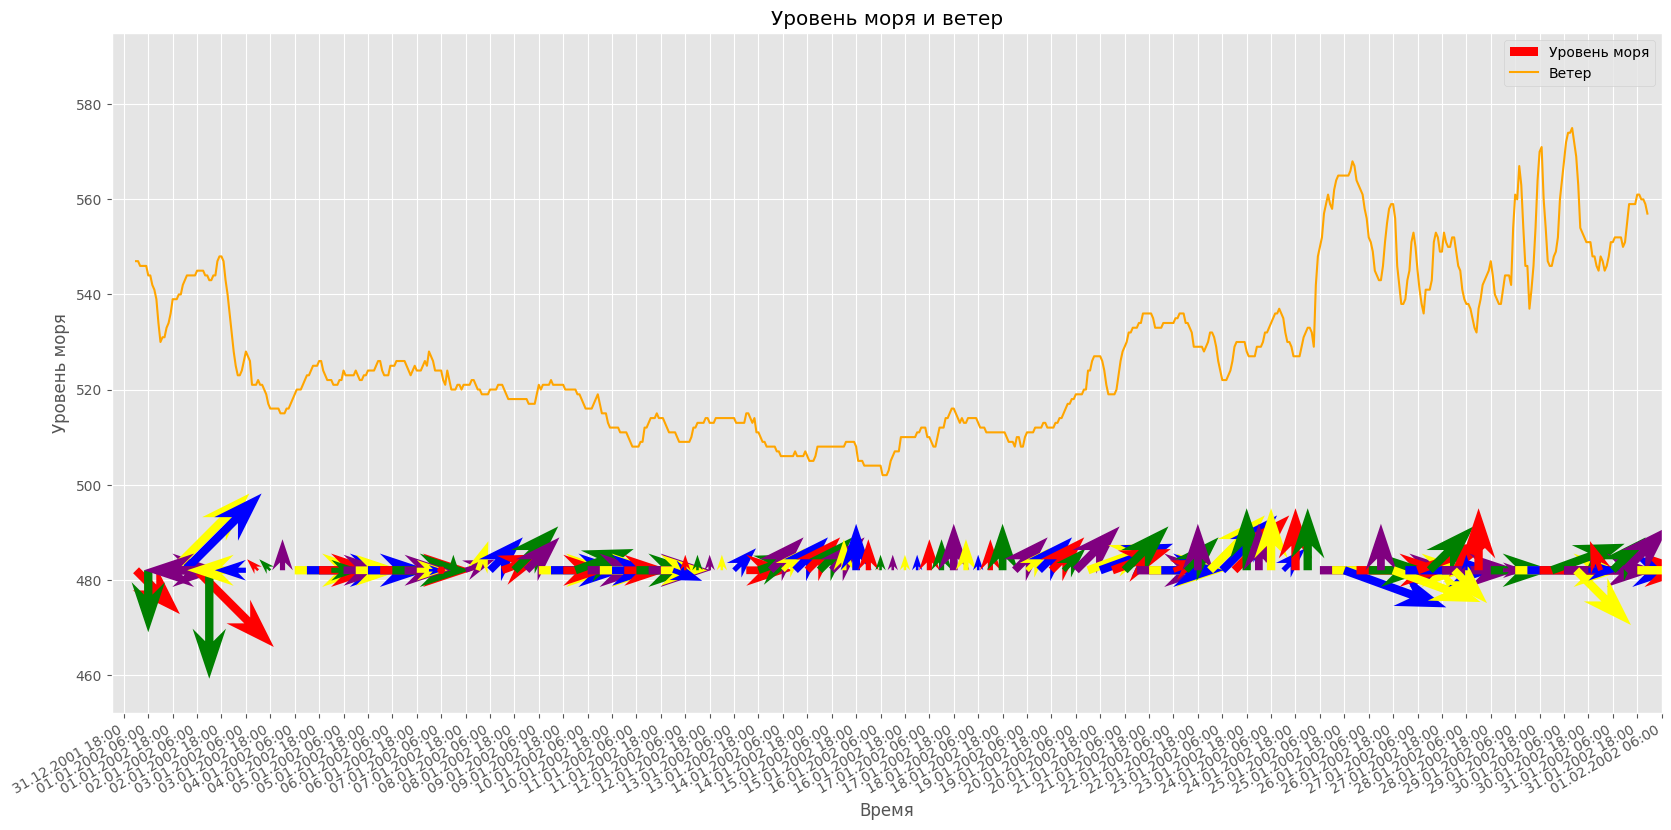

In [167]:
indexes = [datetime.strptime(entry[0], "%d.%m.%Y %H:%M") for entry in answer_1_table]
ys = [min([int(entry[1]) for entry in answer_2_table]) - 20 for i in range(len(answer_1_table))]
dirs_x = [math.cos(math.radians(270 - entry[1])) * entry[2] for entry in answer_1_table]
dirs_y = [math.sin(math.radians(270 - entry[1])) * entry[2] for entry in answer_1_table]

# Cell 7: Plotting
plt.figure(figsize=(20, 10))
plt.quiver(
    indexes,
    ys,
    dirs_x,
    dirs_y,
    headwidth=4,
    headlength=6,
    color=["red", "green", "purple", "yellow", "blue"],
    scale=200,
)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m.%Y %H:%M"))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))
plt.gcf().autofmt_xdate()
plt.xlim(
    datetime.strptime(answer_1_table[0][0], "%d.%m.%Y %H:%M") - timedelta(hours=12),
    datetime.strptime(answer_1_table[-1][0], "%d.%m.%Y %H:%M") + timedelta(hours=12),
)
plt.ylim(
    min([int(entry[1]) for entry in answer_2_table]) - 50,
    max([int(entry[1]) for entry in answer_2_table]) + 20,
)

sea_x = [datetime.strptime(entry[0], "%d.%m.%Y %H:%M") for entry in answer_2_table]
sea_y = [int(entry[1]) for entry in answer_2_table]
plt.plot(sea_x, sea_y, color="orange")

plt.xlabel("Время")
plt.ylabel("Уровень моря")
plt.legend(["Уровень моря", "Ветер"])
plt.title("Уровень моря и ветер")

plt.show()